Finding Corners...


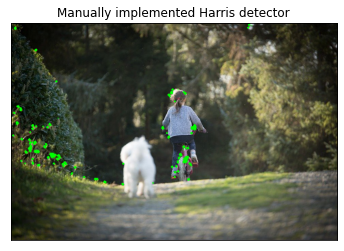

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def my_harris(img_dir,window_size,k,threshold):
    img = img_dir
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img,(x,y),2,(0,255,0))
                
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()

img = cv2.imread("dogwithgirl.jpg")
my_harris(img, 4, 0.08, 0.35)